In [52]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input,test_target)= keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [2]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

/Users/juyoung/pjs/playWithData/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

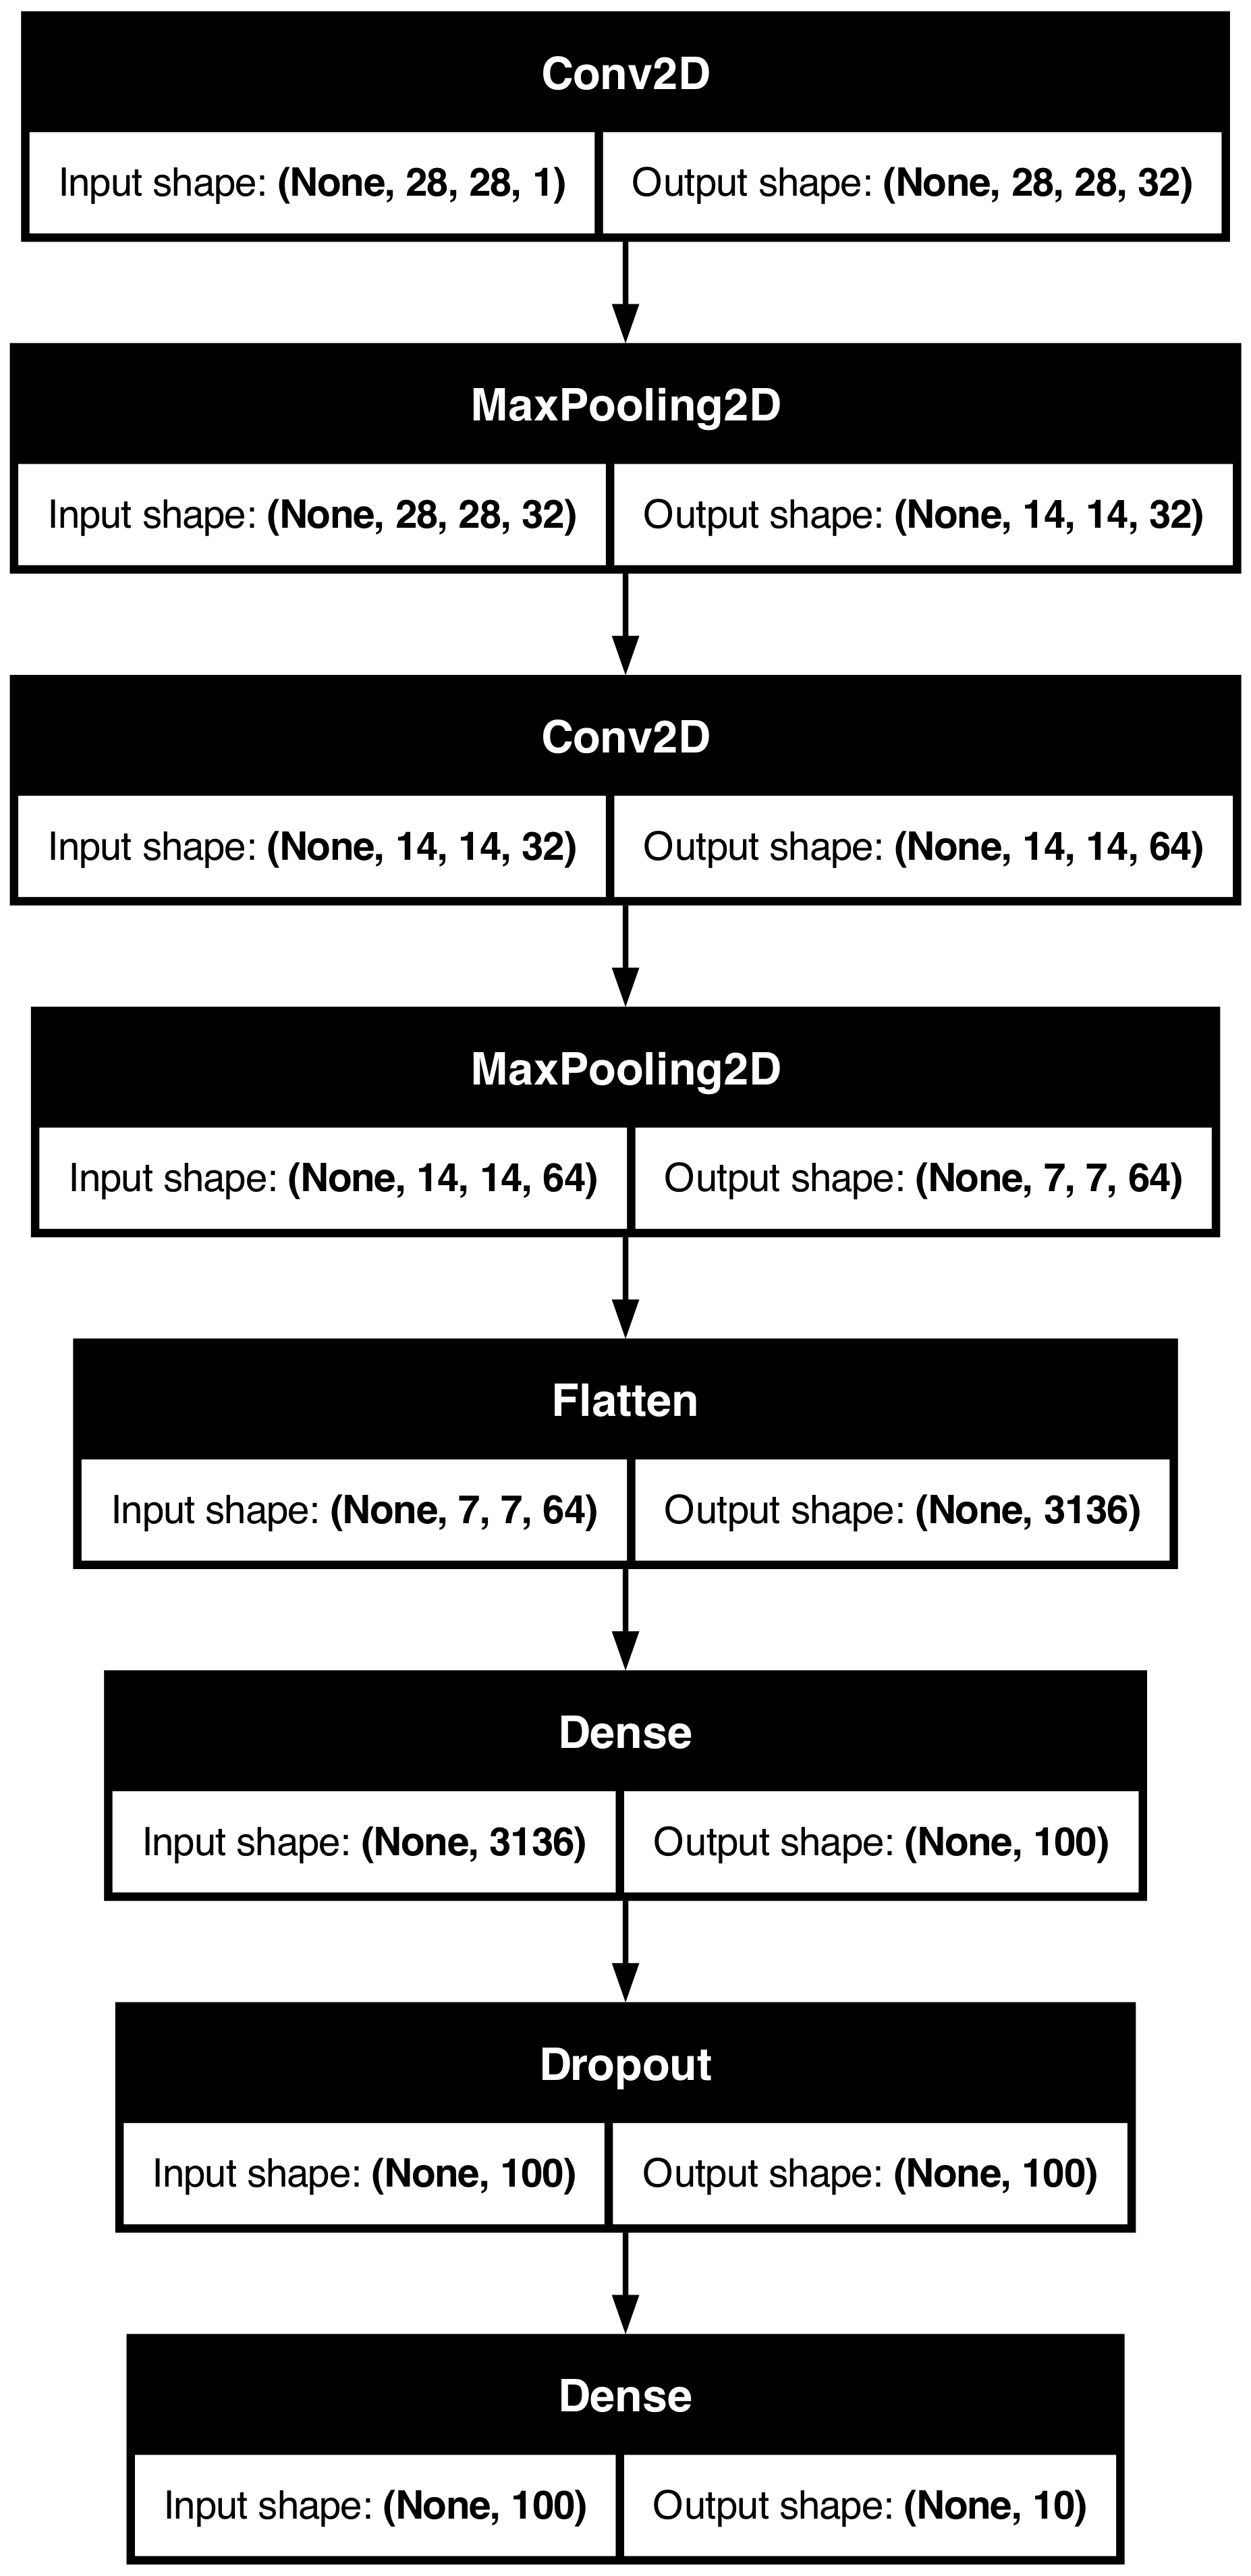

In [47]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5.keras')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
model.fit(train_scaled,train_target,epochs=3,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# history=model.fit(train_scaled,train_target,epochs=30,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9404 - loss: 0.1538 - val_accuracy: 0.9213 - val_loss: 0.2351
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9476 - loss: 0.1392 - val_accuracy: 0.9197 - val_loss: 0.2337
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9471 - loss: 0.1383 - val_accuracy: 0.9212 - val_loss: 0.2310


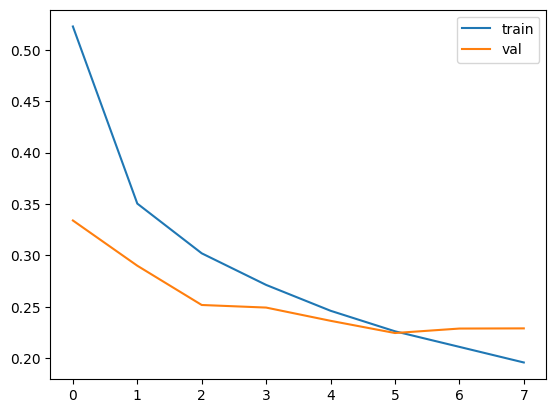

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [56]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9255 - loss: 0.2180


[0.2179856151342392, 0.9243333339691162]

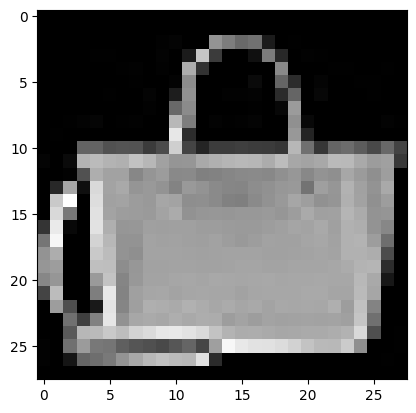

In [11]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray')
plt.show()

In [12]:
preds=model.predict(val_scaled[0:1])
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[3.2816215e-18, 1.0199248e-24, 3.3976395e-20, 2.0906714e-20,
        3.8927986e-20, 1.6934998e-17, 8.5381467e-20, 2.7650988e-19,
        1.0000000e+00, 1.8764508e-17]], dtype=float32)

In [17]:
import numpy as np
test=np.array([
  [
    [[1]],
    [[1]],
  ],
  [
    [[1]],
    [[1]],
  ],
  [
    [[1]],
    [[1]],
  ],
])
print(test.shape)
print(test[0].shape)
print('-'*50)
print(test[0:1].shape)

(3, 2, 1, 1)

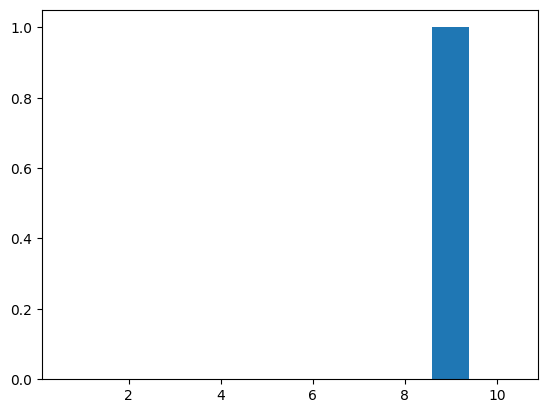

In [21]:
plt.bar(range(1,11),preds[0])
plt.show()

In [22]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [23]:
classes[np.argmax(preds)]

'가방'

In [45]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9116 - loss: 0.2623


[0.2552231550216675, 0.9124000072479248]

In [43]:
model=keras.models.load_model('best-cnn-model.h5.keras')
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [26]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [28]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.016929269 0.23716164


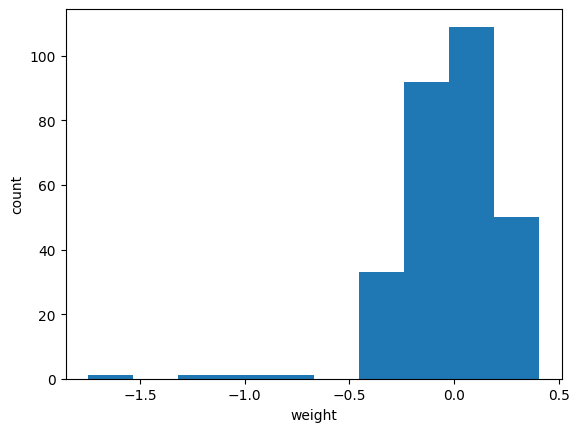

In [30]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

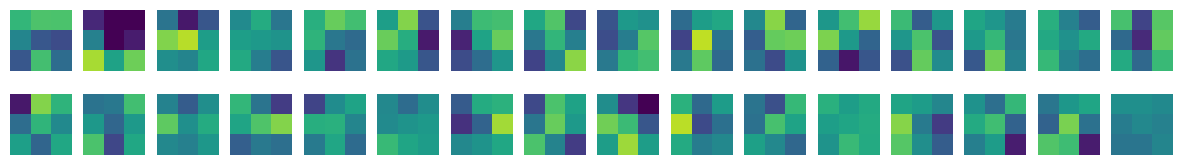

In [32]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [33]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


/Users/juyoung/pjs/playWithData/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

-0.0028158824 0.08310434


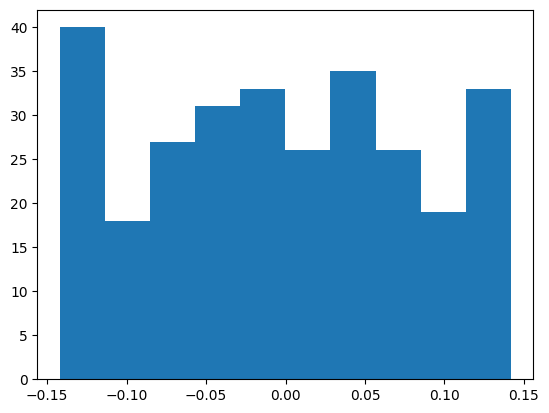

In [35]:
plt.hist(no_training_weights.reshape(-1,1))
plt.show()

In [40]:
test=no_training_weights.reshape(-1,1)
test[:5]

array([[ 0.00508402],
       [-0.0295032 ],
       [-0.0093378 ],
       [-0.02011434],
       [-0.02420411]], dtype=float32)

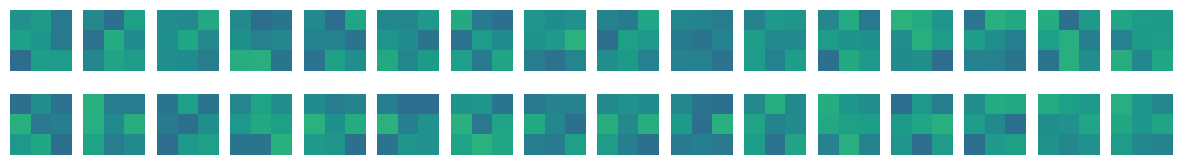

In [41]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
inputs=keras.Input(shape=(784,))
dense1=keras.layers.Dense(100,activation='sigmoid')
dense2=keras.layers.Dense(10,activation='softmax')
hidden=dense1(inputs)
outputs=dense2(hidden)
model_test=keras.Model(inputs,outputs)

In [63]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]

In [64]:
conv_acti=keras.models.Model(model.inputs,model.layers[0].output)

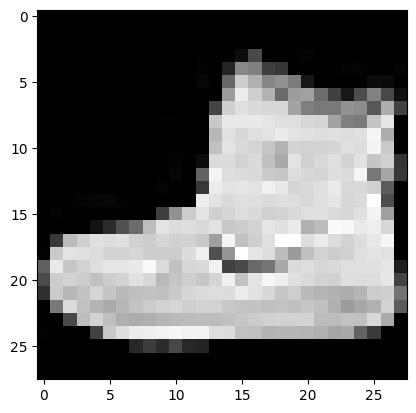

In [49]:
(train_input, train_target), (test_input,test_target)= keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray')
plt.show()

In [65]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


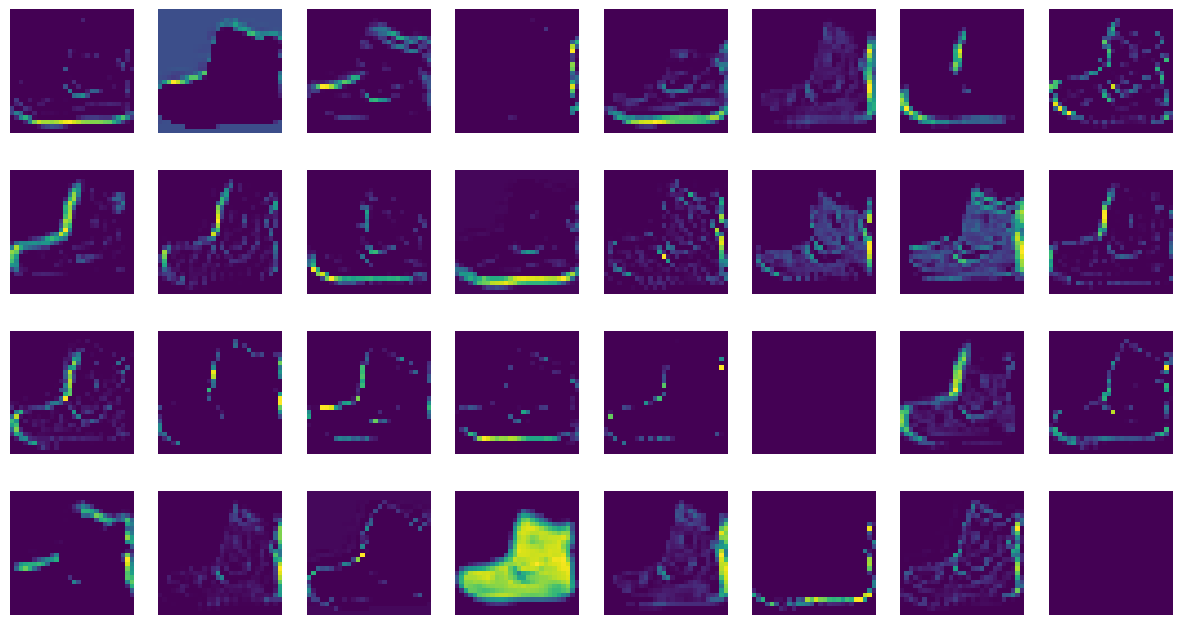

In [69]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [70]:
conv_acti2=keras.models.Model(model.inputs,model.layers[2].output)

In [71]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti2.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


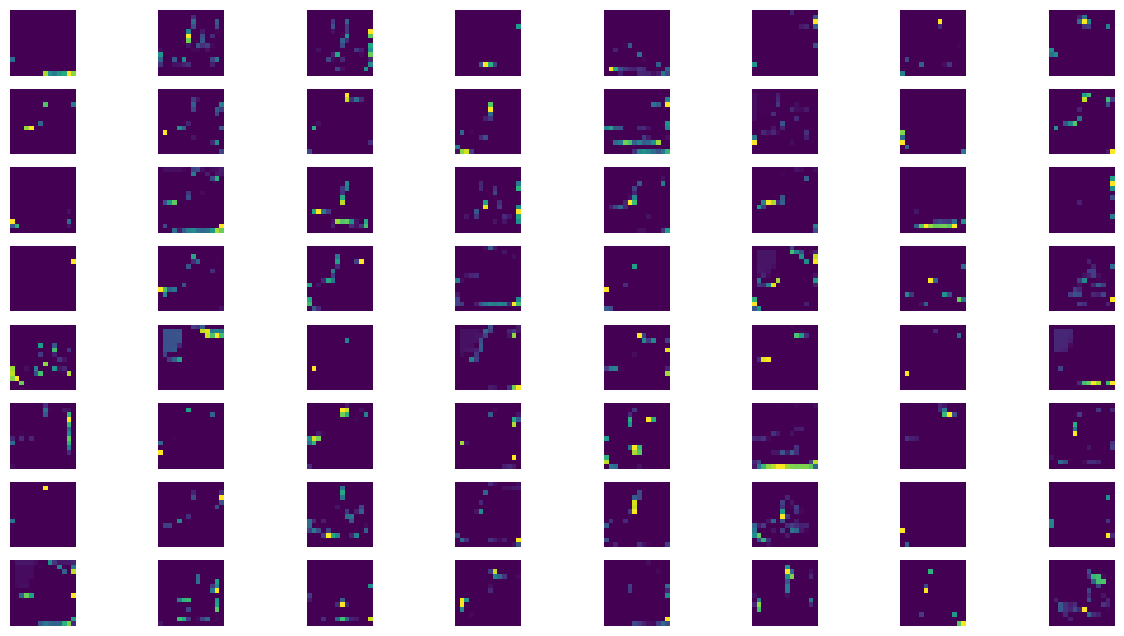

In [72]:
fig,axs=plt.subplots(8,8,figsize=(15,8))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()